In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# 获取股票数据
stock_data = yf.download('^N225', start='2010-01-01', end='2022-12-31')
training_set=stock_data['Close'].values.reshape(-1,1)

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 3179):  # 3179 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
98/98 [==============================] - 8s 13ms/step - loss: 0.0202
Epoch 2/100
98/98 [==============================] - 2s 17ms/step - loss: 0.0038
Epoch 3/100
98/98 [==============================] - 2s 16ms/step - loss: 0.0036
Epoch 4/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 5/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 6/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 7/100
98/98 [==============================] - 1s 12ms/step - loss: 0.0028
Epoch 8/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0028
Epoch 9/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 10/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 11/100
98/98 [==============================] - 2s 16ms/step - loss: 0.0026
Epoch 12/100
98/98 [==================

In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10609.339844,10694.490234,10608.139648,10654.790039,10654.790039,104400000
2010-01-05,10719.440430,10791.040039,10655.570312,10681.830078,10681.830078,166200000
2010-01-06,10709.549805,10768.610352,10661.169922,10731.450195,10731.450195,181800000
2010-01-07,10742.750000,10774.000000,10636.669922,10681.660156,10681.660156,182600000
2010-01-08,10743.299805,10816.450195,10677.559570,10798.320312,10798.320312,211800000
...,...,...,...,...,...,...
2022-12-26,26299.539062,26438.650391,26294.849609,26405.869141,26405.869141,47300000
2022-12-27,26570.779297,26620.490234,26447.869141,26447.869141,26447.869141,50200000
2022-12-28,26309.339844,26354.269531,26199.669922,26340.500000,26340.500000,61500000


In [ ]:
dataset_test = yf.download('^N225', start='2023-01-01', end='2023-04-08')
real_stock_price=stock_data['Close'][-66:].values.reshape(-1,1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
len(real_stock_price) #126-60=66(筆預測資料)

66

In [ ]:
dataset_total = pd.concat((stock_data['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values# 60 timesteps
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 126):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料  60+四月前的97=137(要扣掉放假等等節日,所以比137少)
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

3/3 [==============================] - 1s 8ms/step


In [127]:
!!pip install japanize-matplotlib

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting japanize-matplotlib',
 '  Downloading japanize-matplotlib-1.1.3.tar.gz (4.1 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/4.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.4/4.1 MB\x1b \x1b12.2 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━\x1b \x1b3.5/4.1 MB\x1b \x1b48.8 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b4.1/4.1 MB\x1b \x1b40.5 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25h  Preparing metadata (setup.py) ... \x1b[?25l\x1b[?25hdone',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.9/dist-packages (from japanize-matplotlib) (3.7.1)',
 'Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.9/dist-packages (f

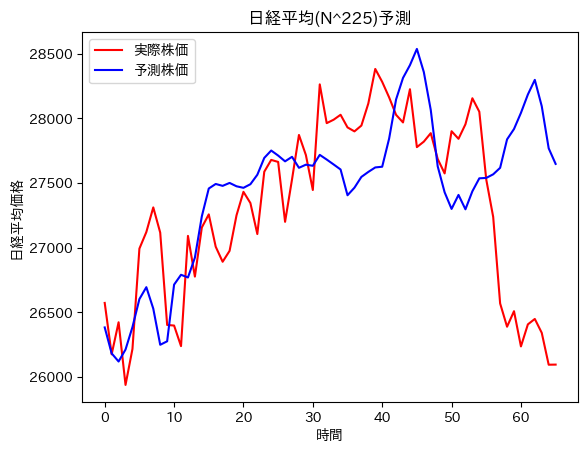

In [134]:
import japanize_matplotlib
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = '実際株価')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = '予測株価')  # 藍線表示預測股價
plt.title('日経平均(N^225)予測')
plt.xlabel('時間')
plt.ylabel('日経平均価格')
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# 获取股票数据
stock_data = yf.download('^N225', start='2018-01-01', end='2022-12-31')
training_set=stock_data['Close'].values.reshape(-1,1)

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, len(stock_data)):  # 3179 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 500, batch_size = 64)

[*********************100%***********************]  1 of 1 completed
Epoch 1/500
19/19 [==============================] - 13s 167ms/step - loss: 0.1139
Epoch 2/500
19/19 [==============================] - 4s 232ms/step - loss: 0.0196
Epoch 3/500
19/19 [==============================] - 3s 165ms/step - loss: 0.0119
Epoch 4/500
19/19 [==============================] - 3s 167ms/step - loss: 0.0093
Epoch 5/500
19/19 [==============================] - 4s 203ms/step - loss: 0.0087
Epoch 6/500
19/19 [==============================] - 4s 198ms/step - loss: 0.0085
Epoch 7/500
19/19 [==============================] - 3s 167ms/step - loss: 0.0083
Epoch 8/500
19/19 [==============================] - 3s 167ms/step - loss: 0.0084
Epoch 9/500
19/19 [==============================] - 4s 233ms/step - loss: 0.0074
Epoch 10/500
19/19 [==============================] - 3s 167ms/step - loss: 0.0078
Epoch 11/500
19/19 [==============================] - 3s 168ms/step - loss: 0.0081
Epoch 12/500
19/19 [======

In [21]:
last_day_data=training_set_scaled[-1]
print(last_day_data)

final_price=0
for i in range(0,10):
  prediction1 = regressor.predict(np.array([last_day_data]))
  last_day_data=prediction1[0]
  print(last_day_data)
final_price=last_day_data
print(final_price)
  



[0.67588636]
1/1 [==============================] - 0s 121ms/step
[0.7388886]
1/1 [==============================] - 0s 96ms/step
[0.7727001]
1/1 [==============================] - 0s 84ms/step
[0.78912663]
1/1 [==============================] - 0s 59ms/step
[0.7966856]
1/1 [==============================] - 0s 76ms/step
[0.8000734]
1/1 [==============================] - 0s 69ms/step
[0.8015733]
1/1 [==============================] - 0s 37ms/step
[0.8022338]
1/1 [==============================] - 0s 31ms/step
[0.802524]
1/1 [==============================] - 0s 24ms/step
[0.8026513]
1/1 [==============================] - 0s 23ms/step
[0.8027071]
[0.8027071]


In [62]:
last_day_data=training_set_scaled[-1]
print(last_day_data)


predictions=[]
for i in range(0,10):
  prediction1 = regressor.predict(np.array([last_day_data]))
  last_day_data=prediction1[0]
  last_day_transform=last_day_data.tolist()[0]
  print(last_day_transform)
  predictions.append(last_day_transform)


predictions=np.array(predictions)

# 将预测值转换为真实的股价
predictions = sc.inverse_transform(predictions.reshape(1,-1))
print(predictions)
predictions=predictions.tolist()
print(type(predictions[0]))
# 打印出预测未来10天的股价
for key,value in enumerate(predictions[0]):
  print("Day ",key+1," ",value)

[0.67588636]
1/1 [==============================] - 0s 25ms/step
0.7388886213302612
1/1 [==============================] - 0s 40ms/step
0.7727000713348389
1/1 [==============================] - 0s 31ms/step
0.7891266345977783
1/1 [==============================] - 0s 24ms/step
0.7966855764389038
1/1 [==============================] - 0s 22ms/step
0.8000733852386475
1/1 [==============================] - 0s 25ms/step
0.8015732765197754
1/1 [==============================] - 0s 25ms/step
0.8022338151931763
1/1 [==============================] - 0s 27ms/step
0.8025239706039429
1/1 [==============================] - 0s 27ms/step
0.8026512861251831
1/1 [==============================] - 0s 23ms/step
0.8027070760726929
[[26983.91989902 27461.24525198 27693.14347303 27799.85509237
  27847.68170232 27868.8560718  27878.18107429 27882.27727643
  27884.07462396 27884.86222568]]
<class 'list'>
Day  1   26983.919899018016
Day  2   27461.245251975022
Day  3   27693.143473030068
Day  4   27799.85509

In [45]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=ebad0d9e12083973450834e31082f7328be2de306053da9fb94302659db295fd
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize_matplotlib


In [71]:
from datetime import date
date2=[]
for i in range(8,18):
  date2.append(date(2023,4,i))

In [75]:
print(date2)

[datetime.date(2023, 4, 8), datetime.date(2023, 4, 9), datetime.date(2023, 4, 10), datetime.date(2023, 4, 11), datetime.date(2023, 4, 12), datetime.date(2023, 4, 13), datetime.date(2023, 4, 14), datetime.date(2023, 4, 15), datetime.date(2023, 4, 16), datetime.date(2023, 4, 17)]


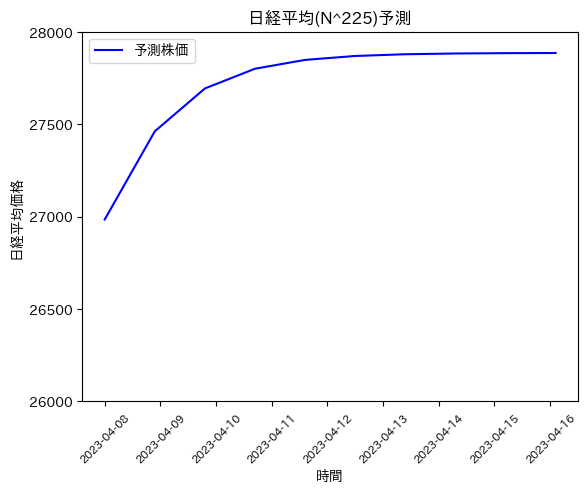

In [96]:
import japanize_matplotlib
from datetime import date
x_ticks=np.linspace(0,10,10)
plt.xticks(x_ticks,date2,rotation=45,fontsize=8)
# Visualising the results
#plt.plot(real_stock_price, color = 'red', label = '実際株価')  # 紅線表示真實股價
plt.plot(predictions[0], color = 'blue', label = '予測株価')  # 藍線表示預測股價
#plt.plot(date2,predictions[0])
plt.yticks([26000,26500,27000,27500,28000])

plt.title('日経平均(N^225)予測')
plt.xlabel('時間')
plt.ylabel('日経平均価格')
plt.legend()
plt.show()